In [1]:
import mglearn
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"  #(windows)
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


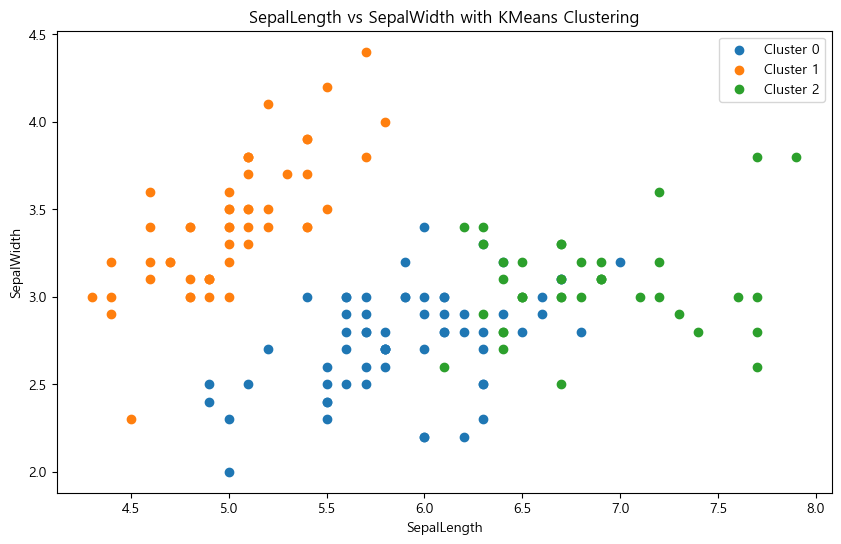

In [3]:
# 1-1) SepalLength,SepalWidth 을 각각 x,y 축 데이터로 산점도 그래프 그리기
# (  클러스터 LABEL 별 다른 색으로 표현)  

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# iris.csv 파일 읽기
iris_data = pd.read_csv('iris.csv')

# KMeans 모델 생성
kmeans_model = KMeans(n_clusters=3, random_state=42)
iris_data['Cluster'] = kmeans_model.fit_predict(iris_data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']])

# 산점도 그래프 생성
plt.figure(figsize=(10, 6))

# 클러스터 label 별로 다른 색으로 표현
for cluster_label in range(3):
    cluster_data = iris_data[iris_data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['SepalLength'], cluster_data['SepalWidth'], label=f'Cluster {cluster_label}')

plt.title('SepalLength vs SepalWidth with KMeans Clustering')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()



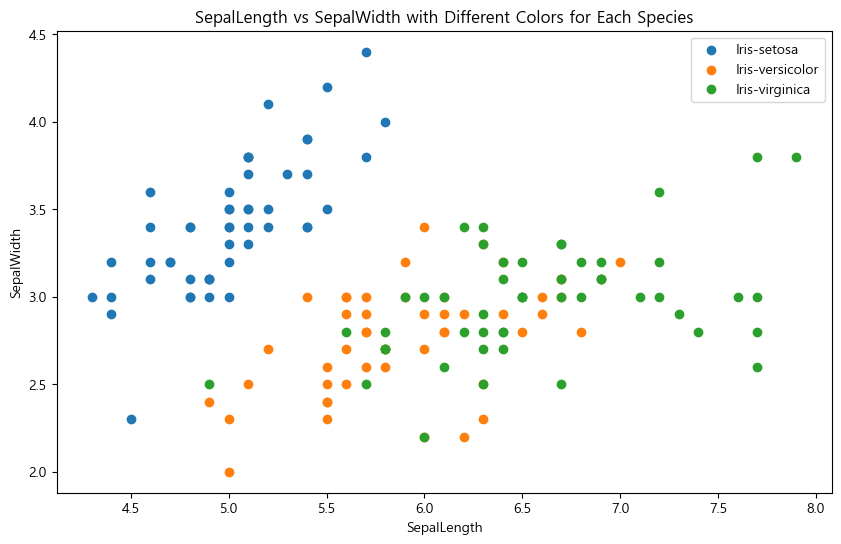

In [4]:
# 1-2) SepalLength,SepalWidth 을 각각 x,y 축 데이터로 산점도 그래프 그리기
# (  NAME  속성 값 별로 다른 색으로 표현)  

import pandas as pd
import matplotlib.pyplot as plt

# iris.csv 파일 읽기
iris_data = pd.read_csv('iris.csv')

# 산점도 그래프 생성
plt.figure(figsize=(10, 6))

# NAME 속성 값 별로 다른 색으로 표현
for species in iris_data['Name'].unique():
    species_data = iris_data[iris_data['Name'] == species]
    plt.scatter(species_data['SepalLength'], species_data['SepalWidth'], label=species)

plt.title('SepalLength vs SepalWidth with Different Colors for Each Species')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()


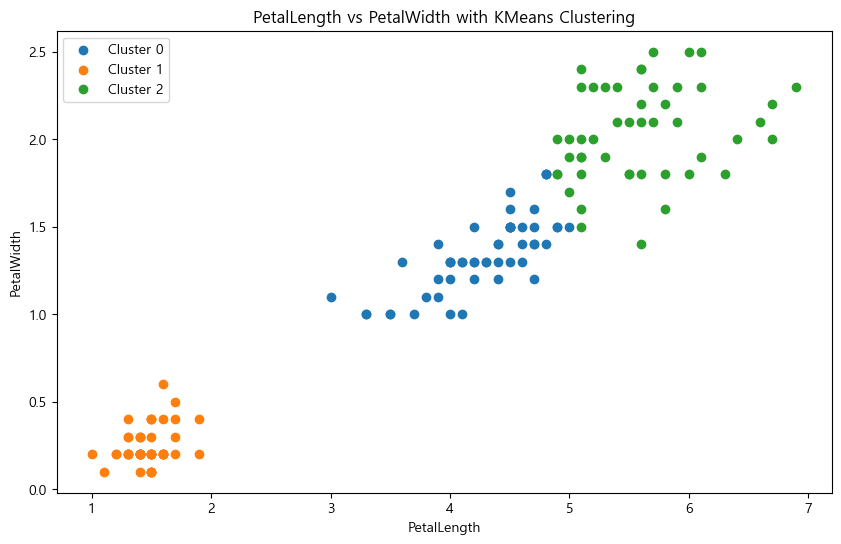

In [5]:
# 2-1) PetalLength,PetalWidth 을 각각 x,y 축 데이터로 산점도 그래프 그리기
# (  클러스터 LABEL 별 다른 색으로 표현) 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# iris.csv 파일 읽기
iris_data = pd.read_csv('iris.csv')

# KMeans 모델 생성
kmeans_model = KMeans(n_clusters=3, random_state=42)
iris_data['Cluster'] = kmeans_model.fit_predict(iris_data[['PetalLength', 'PetalWidth']])

# 산점도 그래프 생성
plt.figure(figsize=(10, 6))

# 클러스터 label 별로 다른 색으로 표현
for cluster_label in range(3):
    cluster_data = iris_data[iris_data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PetalLength'], cluster_data['PetalWidth'], label=f'Cluster {cluster_label}')

plt.title('PetalLength vs PetalWidth with KMeans Clustering')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()


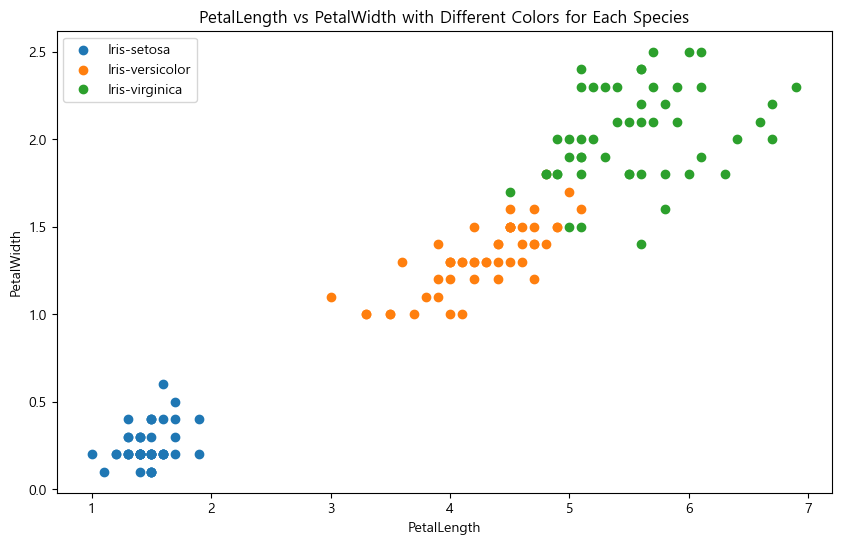

In [6]:
# 2-2) PetalLength,PetalWidth 을 각각 x,y 축 데이터로 산점도 그래프를 그리세요. 
# (  NAME  속성 값 별로 다른 색으로 표현) 

import pandas as pd
import matplotlib.pyplot as plt

# iris.csv 파일 읽기
iris_data = pd.read_csv('iris.csv')

# 산점도 그래프 생성
plt.figure(figsize=(10, 6))

# NAME 속성 값 별로 다른 색으로 표현
for species in iris_data['Name'].unique():
    species_data = iris_data[iris_data['Name'] == species]
    plt.scatter(species_data['PetalLength'], species_data['PetalWidth'], label=species)

plt.title('PetalLength vs PetalWidth with Different Colors for Each Species')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()


In [9]:
# 3)  품종을 제외한 4개의 열을 2차원으로 차원 축소 후,산점도 그래프를 두개 그리세요. 
#     첫번째 산점도 그래프는  품종별로 다른 색으로 표현 
#     두번째 산점도 그래프는  KMeans  로 3개 클러스터로  
#     클러스터링한 결과를 다른 색으로 표현 

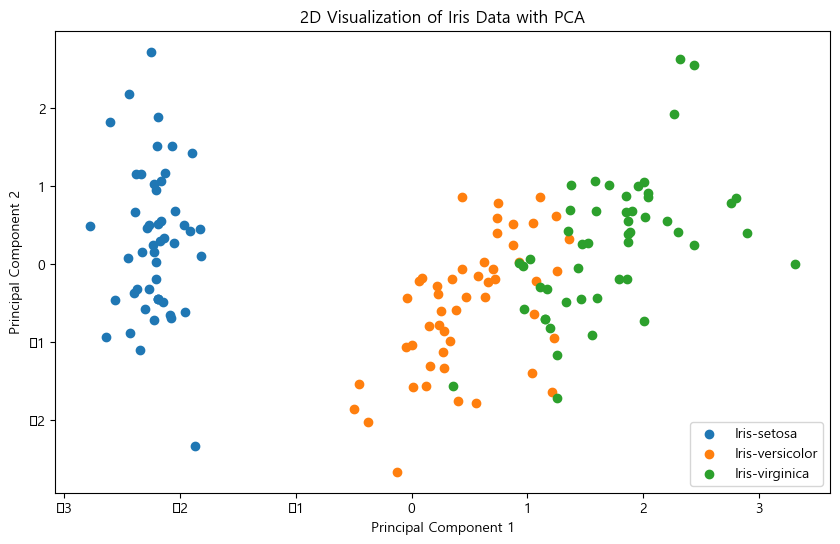

In [18]:
# 3-1) 품종별로 다른 색 표현

#1) PCA 적용 전 각 특성의 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

#####################################
from sklearn.preprocessing import StandardScaler

# iris.csv 파일 읽기
iris_data = pd.read_csv('iris.csv')

# 품종 이름 정보 저장 및 품종 이름 제거
species = iris_data['Name']
iris_data = iris_data.drop(columns=['Name'])

# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)

# 2) 4개의 열을 2차원으로 차원 축소 (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
iris_pca = pca.fit_transform(iris_scaled)


# 3) # 산점도 그래프 생성

import mglearn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 품종별로 다른 색으로 표현
for sp in species.unique():
    species_indices = species[species == sp].index
    plt.scatter(iris_pca[species_indices, 0], iris_pca[species_indices, 1], label=sp)

plt.title('2D Visualization of Iris Data with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

 

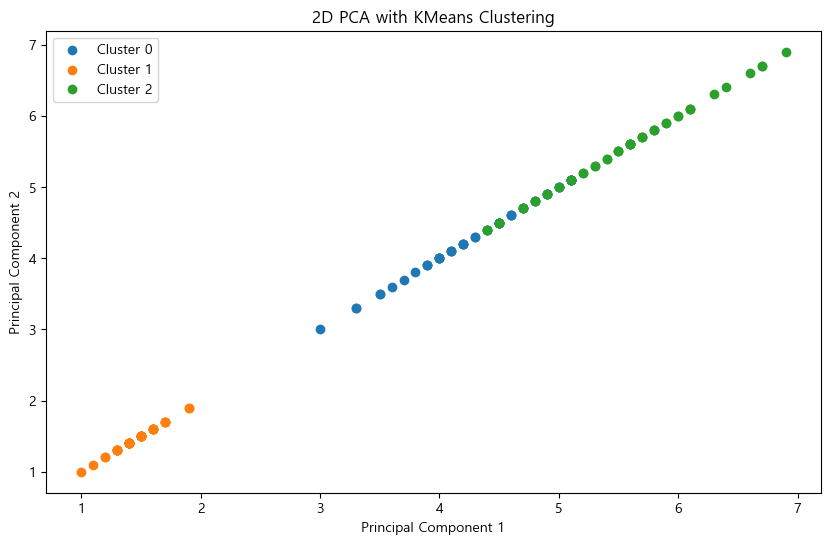

In [24]:
# 3-2) KMeans 3개 클러스터로 클러스터링한 결과를 다른 색으로 표현
# KMeans 모델 생성
kmeans_model = KMeans(n_clusters=3, random_state=42)
iris_data['Cluster'] = kmeans_model.fit_predict(iris_scaled)

# 산점도 그래프 생성
plt.figure(figsize=(10, 6))

# 클러스터 별로 다른 색으로 표현
for cluster_label in range(3):
    cluster_data = iris_data[iris_data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PetalLength'], cluster_data['PetalLength'], label=f'Cluster {cluster_label}')

plt.title('2D PCA with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()